<a href="https://colab.research.google.com/github/lephuong02062000/LeThiPhuong_ToxicQuestion/blob/master/lethiphuong_18021027.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mô tả yêu cầu bài toán:
* Đây là bài toán phân loại các câu hỏi thiếu chân thành, những câu hỏi được đặt ra dựa trên những tiền đề sai lầm hoặc có ý định đưa ra một tuyên bố hơn là tìm kiếm những câu trả lời hữu ích trên Quora


# I. Data Overview

> **1. Load dữ liệu**

In [1]:
import pandas as pd
import re

In [2]:
train_df = pd.read_csv("/content/sample_data/Data/Input/train.csv")
test_df = pd.read_csv("/content/sample_data/Data/Input/test.csv")
train_df


,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


**=> Nhận xét:** 

* Về yêu cầu bài toán ta thấy đây là bài toán phân lớp nhị phân, mục đích là phải detect được câu hỏi nào là toxic
* Nhìn vào question_text thì ta có thể thấy rằng đây là dữ liệu tiếng anh, mỗi mẫu là các câu hỏi, nhìn chung các câu hỏi này hỏi về vấn đề chính trị, giáo dục, giới tính,... Là chủ đề về xã hội. 
* cần phải được tiền xử lý qua các bước như đưa về dạng gốc, tokenize, loại bỏ stop words, loại bỏ dấu,...

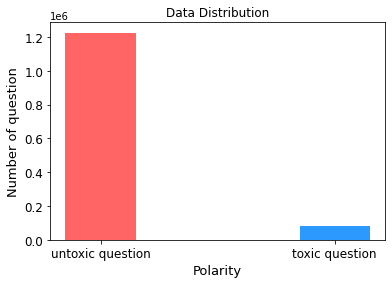

<Figure size 360x720 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
labels = [ 'untoxic question', 'toxic question']
x = train_df['target'].value_counts().to_list()
y = labels
plt.xticks(fontsize =12)
plt.yticks(fontsize =12)
plt.xlabel('Polarity',fontsize =13)
plt.ylabel('Number of question',fontsize = 13)
# plt.xticks(rotation)
color_list = [ '#FF6565', '#2C99FE']
plt.bar(y,x,color = color_list,width=0.3, align='center',)
plt.title('Data Distribution')
plt.figure(figsize=(5,10))
plt.show()

**=> Nhận xét:** 
* nhìn vào biểu đồ trên ta thấy dữ liệu gặp phải vấn đề mất cân bằng. Cụ thể là nhãn có score là 1 (chính là nhãn toxic) ít hơn rất nhiều so với nhãn có score là 0 ( nhãn bình thường)

# II. Làm sạch dữ liệu:
> **1. Loại bỏ punctuation, viết thường các chữ**


In [4]:
puncts = [
    '½', '¿', 'ï', '¸', '-', ',', '/', '"', '¨', '²', 'è', '×', '❤', '，', '↓', '▾', '↑',
    'Ã', '±', ']', '·', '_', '<', '?', '⋅', '™', '~', '→', '′', '>', '≤', '€', '¥', '¼',
    '¶', '@', '√', '®', '\\', '…', '、', '¹', '$', '•', '!', '¯', '&', '†', ')', '・', '^',
    '—', '+', '#', '（', '³', '£', '″', '−', '[', '¬', '¦', '）', '–', '”', '¢', '%', '©',
    '»', '}', '¾', '§', '=', '{', '‘', '∞', 'Ø', '°', '|', '：', '▒', 'â', 'à', ':', '(',
    ';', '`', '│', 'é', '*', '’', '.', '\'', '“',
]

def remove_punctuation(text):
    for punct in puncts:
        if punct in text:
            text = text.lower()
            text = text.replace(punct, '')
            text = text.strip()
    return text

train_df['question_text'] = train_df['question_text'].apply(remove_punctuation)
test_df['question_text'] = test_df['question_text'].apply(remove_punctuation)
train_df.question_text[0]

'how did quebec nationalists see their province as a nation in the 1960s'

> **2. Loại bỏ các số**

In [5]:
def remove_numbers(text):
    text_removed_number = ''.join([i for i in text if not i.isdigit()])
    return text_removed_number
train_df['question_text'] = train_df['question_text'].apply(remove_numbers)
test_df['question_text'] = test_df['question_text'].apply(remove_numbers)
train_df

,qid,question_text,target
0,00002165364db923c7e6,how did quebec nationalists see their province...,0
1,000032939017120e6e44,do you have an adopted dog how would you encou...,0
2,0000412ca6e4628ce2cf,why does velocity affect time does velocity af...,0
3,000042bf85aa498cd78e,how did otto von guericke used the magdeburg h...,0
4,0000455dfa3e01eae3af,can i convert montra helicon d to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,what other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,does ms in ece have good job prospects in usa ...,0
1306119,ffffd48fb36b63db010c,is foam insulation toxic,0
1306120,ffffec519fa37cf60c78,how can one start a research project based on ...,0


> **2. Tokenize text**

In [6]:

def tokenize(text):
    tokens =re.split('\W+',text)
    return tokens

train_df['question_text']= train_df['question_text'].apply(tokenize)
test_df['question_text']= test_df['question_text'].apply(tokenize)
train_df.head()
    

,qid,question_text,target
0,00002165364db923c7e6,"[how, did, quebec, nationalists, see, their, p...",0
1,000032939017120e6e44,"[do, you, have, an, adopted, dog, how, would, ...",0
2,0000412ca6e4628ce2cf,"[why, does, velocity, affect, time, does, velo...",0
3,000042bf85aa498cd78e,"[how, did, otto, von, guericke, used, the, mag...",0
4,0000455dfa3e01eae3af,"[can, i, convert, montra, helicon, d, to, a, m...",0


> **3. Remove stopword:**


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopword =nltk.corpus.stopwords.words('english')

def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

train_df['question_text'] = train_df['question_text'].apply(remove_stopwords)
test_df['question_text'] = test_df['question_text'].apply(remove_stopwords)
train_df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train_df.head()

> **4. Lemmatizing**

In [ ]:
wn = nltk.WordNetLemmatizer()
nltk.download('wordnet')
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

train_df['question_text'] = train_df['question_text'].apply(lambda x: lemmatizing(x))
test_df['question_text'] = test_df['question_text'].apply(lambda x: lemmatizing(x))

train_df.head()



# III. Biểu diễn dữ liệu


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

> **1. chọn đặc trưng dùng SelectKBest với score_func là chi2**

In [ ]:
def feature_select(corpus, labels, k=1000000):
    """
    select top k features through chi-square test
    """
    bin_cv = CountVectorizer(analyzer="word", tokenizer=None, preprocessor=None, stop_words=None, binary=True)
    le = LabelEncoder()
    X = bin_cv.fit_transform(corpus, np.nan)
    y = le.fit_transform(labels).reshape(-1, 1)

    skb = SelectKBest(chi2, k='all')
    skb.fit(X, y)

    feature_ids = skb.get_support(indices=True)
    feature_names = bin_cv.get_feature_names()
    result = {}
    vocab = []

    for new_fid, old_fid in enumerate(feature_ids):
        feature_name = feature_names[old_fid]
        vocab.append(feature_name)

    result['text'] = vocab
    result['_score'] = list(skb.scores_)
    result['_pvalue'] = list(skb.pvalues_)

    return result

In [ ]:
corpus = []
for question in train_df.question_text:
    corpus.append(' '.join(question))
corpus
scores = []
for score in train_df.target:
    scores.append(score)
file_out = feature_select(corpus, scores)
df = pd.DataFrame(file_out)
df = df.sort_values('_score', ascending=False)


In [ ]:
df

* **Chuẩn hóa điểm score của chi2 về trong khoảng 0 đến 1 dùng Min_max scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
def scaling(data):
    scaler = MinMaxScaler()
    scaler.fit(data)
    scores = scaler.transform(data)
    return scores
scores = np.array(df._score)
scores = scores.reshape((len(scores),1))
df._score = scaling(scores).reshape((len(scores)))
# df.to_csv('./chi2_vocabulary.csv', ',', encoding='utf-8')
df


> **2. Biểu diễn dữ liệu**

Sau khi dùng chi2 để đánh trọng số các từ, tiến hành lọc vocab theo ngưỡng điểm _score

In [ ]:
#load vocabulary
vocab_df = pd.read_csv("/content/sample_data/Data/Vocab/chi2_vocabulary.csv.csv")
X_train = []
vocab = vocab_df.set_index('text').T.to_dict('list')
vocab
def vectorizing(text):
  text_to_vec = [vocab[t] for t in text]
  return  text_to_vec

for text in train_df.question_text:
  text_to_vec = [vocab[t][0] if t in vocab.keys() else 0 for t in text]
  X_train.append(text_to_vec)
X_train

In [ ]:

from keras.preprocessing.sequence import pad_sequences
MAX_SENTENCE_LENGTH = 69 # Độ dài tối đa của chuỗi
PADDING_TYPE = 'post' # kiểu padding, post = cuối chuỗi
TRUNCATE_TYPE = 'post'# kiểu truncating, post = cuối chuỗi
X_train
def create_sequence(tokenizer):
    word_sequeces = tokenizer
    padded_word_sequences = pad_sequences(word_sequeces, maxlen=MAX_SENTENCE_LENGTH, padding=PADDING_TYPE, truncating=TRUNCATE_TYPE)
    return padded_word_sequences
padded_sequences = create_sequence(X_train)

    
# Độ dài của mỗi chuỗi
print("Length of 10 first word_sequences:")
print(list(map(lambda x: len(x) ,padded_sequences[:10])))



In [ ]:
print("\n10 first word_sequences:")
for sequence in padded_sequences[50:100]:
    print(sequence)

In [ ]:
Y_train  = train_df.target
Y_train

# IV. Huấn Luyện mô hình

> **1. Chọn model**


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model = LogisticRegression()

train_X, test_X, train_y, test_y = train_test_split(padded_sequences, Y_train, test_size=0.3)
model.fit(train_X, train_y)

> **2. Đánh giá**

In [ ]:
# X_test = []
# for text in test_df.question_text:
#   text_to_vec = [vocab[t][0] if t in vocab.keys() else 0 for t in text]
#   X_test.append(text_to_vec)


In [ ]:
# X_test = create_sequence(X_test)
# X_test

In [ ]:
x = model.predict(test_X)
x
c = 0
for i in x:
  if i ==1 :
    c=c+1
c

In [ ]:
# test_df['prediction'] = x
# test_df

In [ ]:
del test_df['question_text']
test_df


In [ ]:
# count = 0
# for _, p in test_df.iterrows():
#   if p.prediction == 1:
#     count= count+1
# count
# test_df.to_csv('/content/sample_data/Data/Output/submission.csv', ',', encoding='utf-8')


In [ ]:
def evaluate( y_test, y_predicts):
  tp = 0
  fp = 0
  fn = 0
  for g, p in zip(y_test, y_predicts):
    if g == p == 1:
      tp += 1
    elif g == 1:
      fn += 1
    elif p == 1:
      fp += 1
    p = tp / (tp + fp)
    r = tp / (tp + fn)
    f1 = 2 * p * r / (p + r)
  return p, r, f1
f1  = evaluate(test_y, x)
f1
      